In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, Xception
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l2


# utility libraries
import os
import time
import itertools
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_xception.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.2
best_batch_size	= 16
best_epochs	= 15


base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = BatchNormalization()(base_model.output) # JUST ADDED
x = Dropout(best_dropout)(x) # JUST ADDED
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(best_dropout)(x)
x = BatchNormalization()(x) # JUST ADDED

# final softmax probabilistic classification layer - JUST ADDED L2
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(0.05))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# JUST ADDED: get init accuracy before training
initial_loss_val, initial_accuracy_val = model.evaluate(VAL_GENERATOR)
initial_loss_train, initial_accuracy_train = model.evaluate(TRAIN_GENERATOR)

print("Metrics Before Training:")
print(f" - Training   -> Loss: {initial_loss_train:.4f}, Accuracy: {initial_accuracy_train:.4f}")
print(f" - Validation -> Loss: {initial_loss_val:.4f}, Accuracy: {initial_accuracy_val:.4f}")

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)

# append intial values for plotting
history.history['accuracy'].insert(0, initial_accuracy_train) #training
history.history['loss'].insert(0, initial_loss_train)  # training

history.history['val_accuracy'].insert(0, initial_accuracy_val)  # validation
history.history['val_loss'].insert(0, initial_loss_val)  # validation




/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6102 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.


/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 539ms/step - accuracy: 0.0604 - loss: 3.6050
191/191 ━━━━━━━━━━━━━━━━━━━━ 107s 558ms/step - accuracy: 0.0761 - loss: 3.5795
Metrics Before Training:
 - Training   -> Loss: 3.5820, Accuracy: 0.0800
 - Validation -> Loss: 3.6014, Accuracy: 0.0682
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 601ms/step - accuracy: 0.5575 - loss: 2.3358 - val_accuracy: 0.6773 - val_loss: 1.4703
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 115s 600ms/step - accuracy: 0.8256 - loss: 0.9962 - val_accuracy: 0.6909 - val_loss: 1.2005
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 611ms/step - accuracy: 0.8777 - loss: 0.7618 - val_accuracy: 0.6932 - val_loss: 1.1532
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 119s 623ms/step - accuracy: 0.8907 - loss: 0.6936 - val_accuracy: 0.6886 - val_loss: 1.1659
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 615ms/step - accuracy: 0.8922 - loss: 0.6788 - val_accuracy: 0.6909 - val_loss: 1.1328
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 607ms/step - accurac

# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 572ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.666667,0.800000,0.727273,40.000000
american_house_spider,0.750000,0.675000,0.710526,40.000000
bedbug,0.609756,0.625000,0.617284,40.000000
brown_stink_bug,0.842105,0.800000,0.820513,40.000000
carpenter_ant,0.636364,0.700000,0.666667,40.000000
cellar_spider,0.804878,0.825000,0.814815,40.000000
flea,0.465116,0.500000,0.481928,40.000000
house_centipede,0.900000,0.900000,0.900000,40.000000
silverfish,0.761905,0.800000,0.780488,40.000000
subterranean_termite,0.769231,0.500000,0.606061,40.000000


<Figure size 800x600 with 0 Axes>

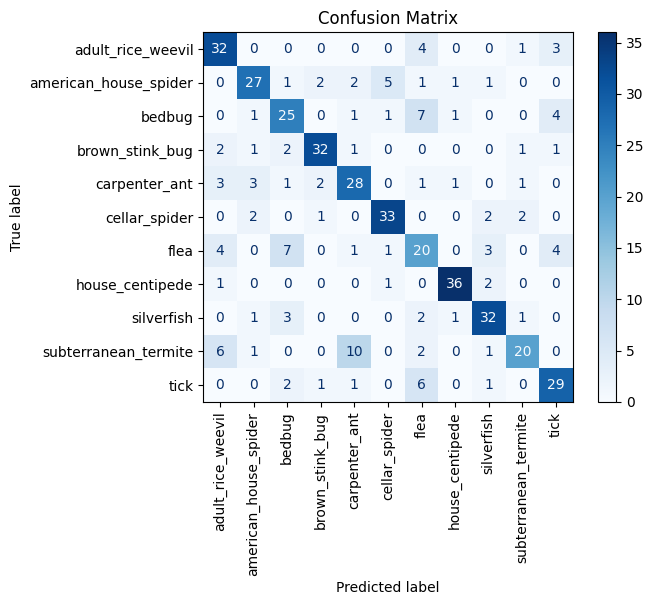

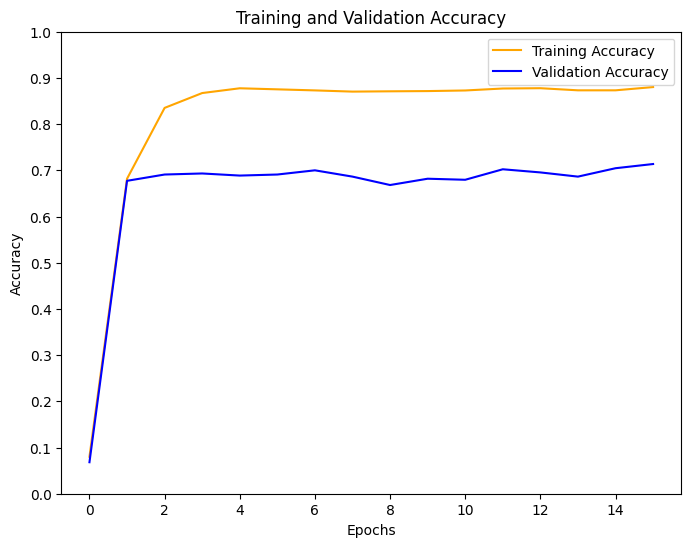

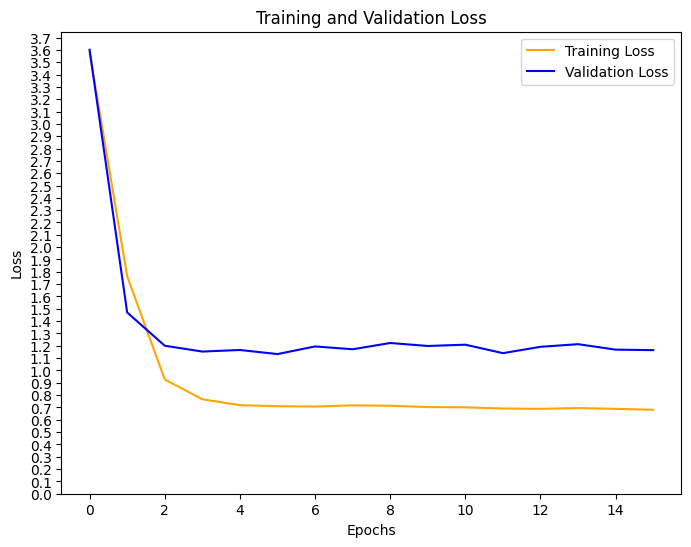

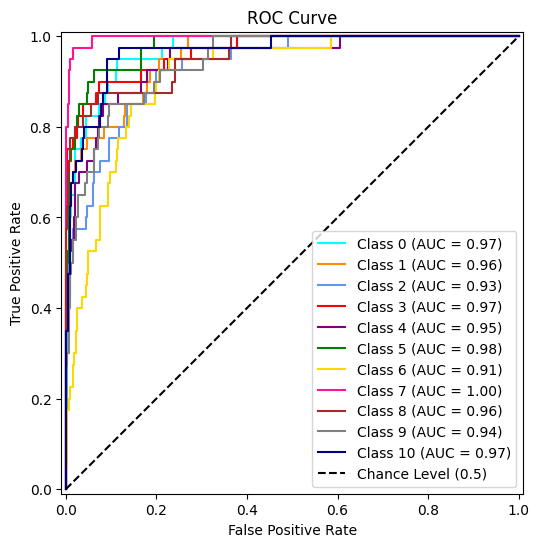

Macro-averaged One-vs-Rest ROC AUC score: 0.96
Accuracy: 0.714
Precision: 0.719
Recall: 0.714
F1 Score: 0.713


{'accuracy': 0.714,
 'precision': 0.719,
 'recall': 0.714,
 'f1_score': 0.713,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.666667  0.800000  0.727273   40.000000
 american_house_spider   0.750000  0.675000  0.710526   40.000000
 bedbug                  0.609756  0.625000  0.617284   40.000000
 brown_stink_bug         0.842105  0.800000  0.820513   40.000000
 carpenter_ant           0.636364  0.700000  0.666667   40.000000
 cellar_spider           0.804878  0.825000  0.814815   40.000000
 flea                    0.465116  0.500000  0.481928   40.000000
 house_centipede         0.900000  0.900000  0.900000   40.000000
 silverfish              0.761905  0.800000  0.780488   40.000000
 subterranean_termite    0.769231  0.500000  0.606061   40.000000
 tick                    0.707317  0.725000  0.716049   40.000000
 accuracy                0.713636  0.713636  0.713636    0.713636
 macro avg               0.719394  

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics: 'accuracy': 0.71,'precision': 0.72,'recall': 0.71,'f1_score': 0.71

# Test plots

/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.736842,0.700000,0.717949,20.000000
american_house_spider,0.842105,0.800000,0.820513,20.000000
bedbug,0.434783,0.500000,0.465116,20.000000
brown_stink_bug,0.875000,0.700000,0.777778,20.000000
carpenter_ant,0.666667,0.800000,0.727273,20.000000
cellar_spider,0.904762,0.950000,0.926829,20.000000
flea,0.391304,0.450000,0.418605,20.000000
house_centipede,0.888889,0.800000,0.842105,20.000000
silverfish,0.700000,0.700000,0.700000,20.000000
subterranean_termite,0.615385,0.400000,0.484848,20.000000


<Figure size 800x600 with 0 Axes>

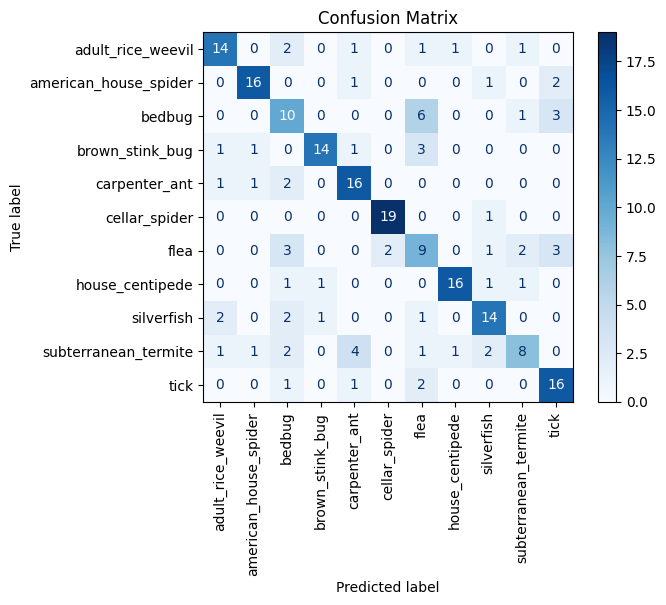

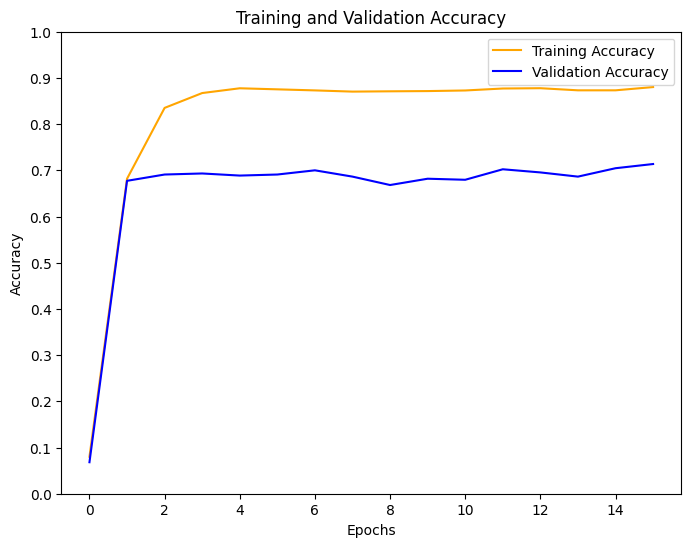

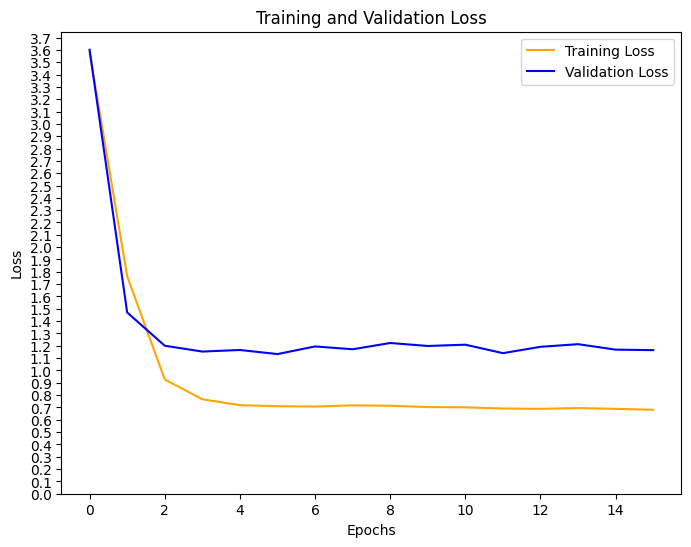

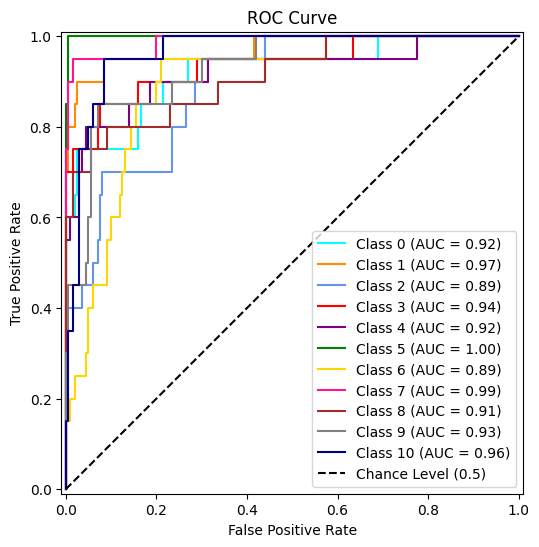

Macro-averaged One-vs-Rest ROC AUC score: 0.94
Accuracy: 0.691
Precision: 0.702
Recall: 0.691
F1 Score: 0.692


{'accuracy': 0.691,
 'precision': 0.702,
 'recall': 0.691,
 'f1_score': 0.692,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.736842  0.700000  0.717949   20.000000
 american_house_spider   0.842105  0.800000  0.820513   20.000000
 bedbug                  0.434783  0.500000  0.465116   20.000000
 brown_stink_bug         0.875000  0.700000  0.777778   20.000000
 carpenter_ant           0.666667  0.800000  0.727273   20.000000
 cellar_spider           0.904762  0.950000  0.926829   20.000000
 flea                    0.391304  0.450000  0.418605   20.000000
 house_centipede         0.888889  0.800000  0.842105   20.000000
 silverfish              0.700000  0.700000  0.700000   20.000000
 subterranean_termite    0.615385  0.400000  0.484848   20.000000
 tick                    0.666667  0.800000  0.727273   20.000000
 accuracy                0.690909  0.690909  0.690909    0.690909
 macro avg               0.702037  

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.69, 'precision': 0.7,'recall': 0.69, 'f1_score': 0.69